In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("marks.csv", header = None, names = ["name", "subject", "marks"])
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [3]:
df.columns

Index(['name', 'subject', 'marks'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     10 non-null     object 
 1   subject  9 non-null      object 
 2   marks    9 non-null      float64
dtypes: float64(1), object(2)
memory usage: 368.0+ bytes


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
marks,9.0,81.888889,15.053608,60.0,70.0,90.0,94.0,98.0


In [6]:
df.shape

(10, 3)

In [7]:
df.values

array([['Bill', 'Java', 90.0],
       ['Bill', 'Python', 95.0],
       ['Steve', 'Java', 80.0],
       ['Steve', 'C', 90.0],
       ['Roberts', 'HTML', 98.0],
       ['Roberts', 'Java', 60.0],
       ['Roberts', 'Python', 70.0],
       ['Steve', 'Python', nan],
       ['Henry', nan, 60.0],
       ['Steve', 'Python', 94.0]], dtype=object)

In [8]:
df.describe(include = "all")

,name,subject,marks
count,10,9,9.000000
unique,4,4,NaN
top,Steve,Python,NaN
freq,4,4,NaN
mean,NaN,NaN,81.888889
std,NaN,NaN,15.053608
min,NaN,NaN,60.000000
25%,NaN,NaN,70.000000
50%,NaN,NaN,90.000000
75%,NaN,NaN,94.000000


In [9]:
df.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['name', 'subject', 'marks'], dtype='object')]

### Retrieving data

In [10]:
df.subject

0      Java
1    Python
2      Java
3         C
4      HTML
5      Java
6    Python
7    Python
8       NaN
9    Python
Name: subject, dtype: object

In [11]:
df[["name","marks"]]

,name,marks
0,Bill,90.0
1,Bill,95.0
2,Steve,80.0
3,Steve,90.0
4,Roberts,98.0
5,Roberts,60.0
6,Roberts,70.0
7,Steve,NaN
8,Henry,60.0
9,Steve,94.0


In [12]:
df[["name","subject","marks"]]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [13]:
df[3:7]    # Slicing by rows

,name,subject,marks
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0


### at, iat, loc, iloc

In [14]:
df.at[3,"marks"]   # by column label

90.0

In [15]:
print(df.at[3,"marks"])

90.0


In [16]:
df.iat[3,0]    # by position

'Steve'

In [17]:
df.marks > 80

0     True
1     True
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9     True
Name: marks, dtype: bool

In [18]:
df[df.marks > 80]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
9,Steve,Python,94.0


In [19]:
df[df.marks > 80].marks

0    90.0
1    95.0
3    90.0
4    98.0
9    94.0
Name: marks, dtype: float64

In [20]:
df[df.subject == "Python"]

,name,subject,marks
1,Bill,Python,95.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [21]:
df[df.marks > 80][["name","marks","subject"]]

,name,marks,subject
0,Bill,90.0,Java
1,Bill,95.0,Python
3,Steve,90.0,C
4,Roberts,98.0,HTML
9,Steve,94.0,Python


### loc and iloc

In [22]:
df.loc[8,"name"]

'Henry'

In [23]:
df.iloc[8,0]

'Henry'

In [24]:
df.loc[df.marks > 80][["name","subject"]]

,name,subject
0,Bill,Java
1,Bill,Python
3,Steve,C
4,Roberts,HTML
9,Steve,Python


In [25]:
df.loc[: 9, : "subject"]  # Rows upto 9, columns upto subject

,name,subject
0,Bill,Java
1,Bill,Python
2,Steve,Java
3,Steve,C
4,Roberts,HTML
5,Roberts,Java
6,Roberts,Python
7,Steve,Python
8,Henry,NaN
9,Steve,Python


In [26]:
df[(df.subject == "Java") & (df.marks > 80)]

,name,subject,marks
0,Bill,Java,90.0


In [27]:
df.loc[0:5, "name": "marks"]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0


In [28]:
df.loc[df.marks > 80, "name" : "marks"]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
9,Steve,Python,94.0


In [29]:
df.iloc[0:3,0:2]

,name,subject
0,Bill,Java
1,Bill,Python
2,Steve,Java


### Sample,isin,where,filter

In [30]:
df.sample(5)

,name,subject,marks
6,Roberts,Python,70.0
2,Steve,Java,80.0
0,Bill,Java,90.0
8,Henry,NaN,60.0
5,Roberts,Java,60.0


In [31]:
df.name.isin(["Bill","Steve"])

0     True
1     True
2     True
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: name, dtype: bool

In [32]:
df[df.name.isin(["Bill","Steve"])]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [33]:
df.where(df.marks > 80)

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,NaN,NaN,NaN
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,Steve,Python,94.0


In [34]:
df.filter(regex = "e$")

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Steve


In [35]:
df.filter(regex = "6", axis = 0)     # Filter by row labels

,name,subject,marks
6,Roberts,Python,70.0


### Operations on columns

In [36]:
df["marks"] - 50

0    40.0
1    45.0
2    30.0
3    40.0
4    48.0
5    10.0
6    20.0
7     NaN
8    10.0
9    44.0
Name: marks, dtype: float64

### nlargest,nsmallest

In [37]:
df.nlargest(5,"marks")

,name,subject,marks
4,Roberts,HTML,98.0
1,Bill,Python,95.0
9,Steve,Python,94.0
0,Bill,Java,90.0
3,Steve,C,90.0


In [38]:
df.nsmallest(4,"marks", keep = "all")

,name,subject,marks
5,Roberts,Java,60.0
8,Henry,NaN,60.0
6,Roberts,Python,70.0
2,Steve,Java,80.0
7,Steve,Python,NaN


In [39]:
df.nlargest(5,"marks",keep = "all")

,name,subject,marks
4,Roberts,HTML,98.0
1,Bill,Python,95.0
9,Steve,Python,94.0
0,Bill,Java,90.0
3,Steve,C,90.0
7,Steve,Python,NaN


In [40]:
df[["name","subject","marks"]].drop_duplicates()

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [41]:
df[["name","subject"]].drop_duplicates()

,name,subject
0,Bill,Java
1,Bill,Python
2,Steve,Java
3,Steve,C
4,Roberts,HTML
5,Roberts,Java
6,Roberts,Python
7,Steve,Python
8,Henry,NaN


In [42]:
df[["name"]].drop_duplicates()

,name
0,Bill
2,Steve
4,Roberts
8,Henry


In [43]:
df.subject.unique()

array(['Java', 'Python', 'C', 'HTML', nan], dtype=object)

In [44]:
df.subject.dropna().unique()

array(['Java', 'Python', 'C', 'HTML'], dtype=object)

# apply() and applymap()

In [45]:
def count_null(s):
    return s.isna().sum()

In [46]:
df.apply(count_null)

name       0
subject    1
marks      1
dtype: int64

In [47]:
df.apply(lambda s: s.notna().sum())

name       10
subject     9
marks       9
dtype: int64

In [48]:
df.apply(lambda v : v.notna().sum(), axis = 1)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    2
8    2
9    3
dtype: int64

In [49]:
type(df[["name"]]),       type(df.name)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [50]:
df[["name","subject"]].apply(lambda v: v.isnull().sum())

name       0
subject    1
dtype: int64

In [51]:
def convert_upper(v):
    if isinstance(v,str):
        return v.strip().upper()
    else:
        return str(v)

In [52]:
df.applymap(lambda v: str(v).upper())

,name,subject,marks
0,BILL,JAVA,90.0
1,BILL,PYTHON,95.0
2,STEVE,JAVA,80.0
3,STEVE,C,90.0
4,ROBERTS,HTML,98.0
5,ROBERTS,JAVA,60.0
6,ROBERTS,PYTHON,70.0
7,STEVE,PYTHON,NAN
8,HENRY,NAN,60.0
9,STEVE,PYTHON,94.0


In [53]:
df[["name","subject"]].applymap(convert_upper)

,name,subject
0,BILL,JAVA
1,BILL,PYTHON
2,STEVE,JAVA
3,STEVE,C
4,ROBERTS,HTML
5,ROBERTS,JAVA
6,ROBERTS,PYTHON
7,STEVE,PYTHON
8,HENRY,nan
9,STEVE,PYTHON


In [54]:
df[["name","subject"]].applymap(lambda v: v.upper() if isinstance(v,str) else "NULL")

,name,subject
0,BILL,JAVA
1,BILL,PYTHON
2,STEVE,JAVA
3,STEVE,C
4,ROBERTS,HTML
5,ROBERTS,JAVA
6,ROBERTS,PYTHON
7,STEVE,PYTHON
8,HENRY,NULL
9,STEVE,PYTHON


# Attribute str

In [55]:
df.name.str.upper()

0       BILL
1       BILL
2      STEVE
3      STEVE
4    ROBERTS
5    ROBERTS
6    ROBERTS
7      STEVE
8      HENRY
9      STEVE
Name: name, dtype: object

In [56]:
df.name.str.count("e")

0    0
1    0
2    2
3    2
4    1
5    1
6    1
7    2
8    1
9    2
Name: name, dtype: int64

In [57]:
df[df.name.str.startswith("S")]

,name,subject,marks
2,Steve,Java,80.0
3,Steve,C,90.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [58]:
df[(df.name.str.len() == 4) | (df.name.str.len() == 5)]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [59]:
df.name.str.findall("[A-Za-z]{1}")

0             [B, i, l, l]
1             [B, i, l, l]
2          [S, t, e, v, e]
3          [S, t, e, v, e]
4    [R, o, b, e, r, t, s]
5    [R, o, b, e, r, t, s]
6    [R, o, b, e, r, t, s]
7          [S, t, e, v, e]
8          [H, e, n, r, y]
9          [S, t, e, v, e]
Name: name, dtype: object

In [60]:
df.subject.str.findall("[A-Za-z]")

0          [J, a, v, a]
1    [P, y, t, h, o, n]
2          [J, a, v, a]
3                   [C]
4          [H, T, M, L]
5          [J, a, v, a]
6    [P, y, t, h, o, n]
7    [P, y, t, h, o, n]
8                   NaN
9    [P, y, t, h, o, n]
Name: subject, dtype: object

In [61]:
df.name.str.extract("([A-Z+])([a-z]+)")

,0,1
0,B,ill
1,B,ill
2,S,teve
3,S,teve
4,R,oberts
5,R,oberts
6,R,oberts
7,S,teve
8,H,enry
9,S,teve


# Adding Rows

In [62]:
df = df.append({"name"  : "Mark", "subject" : "Java",  "marks"  : 95}, ignore_index = True)

C:\Users\nagal\AppData\Local\Temp\ipykernel_7876\4228165569.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name"  : "Mark", "subject" : "Java",  "marks"  : 95}, ignore_index = True)


In [63]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [64]:
df.loc[12] = ["Ravi","DS-ML",99]

In [65]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [66]:
df.loc[10] = ["Ravi", "Java", 96]

In [67]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [68]:
df.loc[13] = ["Chaturya","HTML",np.NaN]

In [69]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [70]:
df.loc[13,"marks"] = 87

In [71]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [72]:
df.index.is_unique

True

# Adding columns

In [73]:
df["passmark"] = 70

In [74]:
df

,name,subject,marks,passmark
0,Bill,Java,90.0,70
1,Bill,Python,95.0,70
2,Steve,Java,80.0,70
3,Steve,C,90.0,70
4,Roberts,HTML,98.0,70
5,Roberts,Java,60.0,70
6,Roberts,Python,70.0,70
7,Steve,Python,NaN,70
8,Henry,NaN,60.0,70
9,Steve,Python,94.0,70


In [75]:
df.head()

,name,subject,marks,passmark
0,Bill,Java,90.0,70
1,Bill,Python,95.0,70
2,Steve,Java,80.0,70
3,Steve,C,90.0,70
4,Roberts,HTML,98.0,70


In [76]:
df.loc[df.subject == "Python", "passmark"] = 65

In [77]:
df

,name,subject,marks,passmark
0,Bill,Java,90.0,70
1,Bill,Python,95.0,65
2,Steve,Java,80.0,70
3,Steve,C,90.0,70
4,Roberts,HTML,98.0,70
5,Roberts,Java,60.0,70
6,Roberts,Python,70.0,65
7,Steve,Python,NaN,65
8,Henry,NaN,60.0,70
9,Steve,Python,94.0,65


In [78]:
df.loc[13, "marks"] = 100

In [79]:
df

,name,subject,marks,passmark
0,Bill,Java,90.0,70
1,Bill,Python,95.0,65
2,Steve,Java,80.0,70
3,Steve,C,90.0,70
4,Roberts,HTML,98.0,70
5,Roberts,Java,60.0,70
6,Roberts,Python,70.0,65
7,Steve,Python,NaN,65
8,Henry,NaN,60.0,70
9,Steve,Python,94.0,65


In [80]:
df[df.marks < df.passmark]

,name,subject,marks,passmark
5,Roberts,Java,60.0,70
8,Henry,NaN,60.0,70


In [81]:
def get_grade(m):
    if m > 90:
        return "A"
    elif m > 80:
        return "B"
    else:
        return "C"

In [82]:
grades = df.marks.apply(get_grade)
grades

0     B
1     A
2     C
3     B
4     A
5     C
6     C
7     C
8     C
9     A
10    A
12    A
13    A
Name: marks, dtype: object

In [83]:
type(grades)

pandas.core.series.Series

In [84]:
df["grade"] = grades

In [85]:
df

,name,subject,marks,passmark,grade
0,Bill,Java,90.0,70,B
1,Bill,Python,95.0,65,A
2,Steve,Java,80.0,70,C
3,Steve,C,90.0,70,B
4,Roberts,HTML,98.0,70,A
5,Roberts,Java,60.0,70,C
6,Roberts,Python,70.0,65,C
7,Steve,Python,NaN,65,C
8,Henry,NaN,60.0,70,C
9,Steve,Python,94.0,65,A


In [86]:
df["passed"] = df.marks >= df.passmark

In [87]:
df

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
4,Roberts,HTML,98.0,70,A,True
5,Roberts,Java,60.0,70,C,False
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True


In [88]:
df.grade.value_counts(ascending = False)

A    6
C    5
B    2
Name: grade, dtype: int64

# Dropping rows and columns

In [89]:
df.drop([12])

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
4,Roberts,HTML,98.0,70,A,True
5,Roberts,Java,60.0,70,C,False
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True


In [90]:
df

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
4,Roberts,HTML,98.0,70,A,True
5,Roberts,Java,60.0,70,C,False
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True


In [91]:
df.drop([4,5], inplace = True, axis = 0)     # Drop rows with indexes 4 and 5 

In [92]:
df

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True
10,Ravi,Java,96.0,70,A,True
12,Ravi,DS-ML,99.0,70,A,True


In [93]:
df.drop([12])

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True
10,Ravi,Java,96.0,70,A,True
13,Chaturya,HTML,100.0,70,A,True


In [94]:
df

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True
10,Ravi,Java,96.0,70,A,True
12,Ravi,DS-ML,99.0,70,A,True


In [95]:
df[df.subject == "Java"].index

Int64Index([0, 2, 10], dtype='int64')

In [96]:
df.drop(df[df.subject == "Python"].index)

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
8,Henry,NaN,60.0,70,C,False
10,Ravi,Java,96.0,70,A,True
12,Ravi,DS-ML,99.0,70,A,True
13,Chaturya,HTML,100.0,70,A,True


In [97]:
df

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True
10,Ravi,Java,96.0,70,A,True
12,Ravi,DS-ML,99.0,70,A,True


In [98]:
df.drop(["grade"], axis = 1)   # Drop column grade temporarly

,name,subject,marks,passmark,passed
0,Bill,Java,90.0,70,True
1,Bill,Python,95.0,65,True
2,Steve,Java,80.0,70,True
3,Steve,C,90.0,70,True
6,Roberts,Python,70.0,65,True
7,Steve,Python,NaN,65,False
8,Henry,NaN,60.0,70,False
9,Steve,Python,94.0,65,True
10,Ravi,Java,96.0,70,True
12,Ravi,DS-ML,99.0,70,True


In [99]:
df

,name,subject,marks,passmark,grade,passed
0,Bill,Java,90.0,70,B,True
1,Bill,Python,95.0,65,A,True
2,Steve,Java,80.0,70,C,True
3,Steve,C,90.0,70,B,True
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True
10,Ravi,Java,96.0,70,A,True
12,Ravi,DS-ML,99.0,70,A,True


# Drop rows where subject is Java

In [100]:
indices = df[df.subject == "Java"].index
indices

Int64Index([0, 2, 10], dtype='int64')

In [101]:
df.drop(index = indices)

,name,subject,marks,passmark,grade,passed
1,Bill,Python,95.0,65,A,True
3,Steve,C,90.0,70,B,True
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False
8,Henry,NaN,60.0,70,C,False
9,Steve,Python,94.0,65,A,True
12,Ravi,DS-ML,99.0,70,A,True
13,Chaturya,HTML,100.0,70,A,True


# Reshaping Data

In [102]:
df.dropna().sort_values(by = "marks", ascending = False)

,name,subject,marks,passmark,grade,passed
13,Chaturya,HTML,100.0,70,A,True
12,Ravi,DS-ML,99.0,70,A,True
10,Ravi,Java,96.0,70,A,True
1,Bill,Python,95.0,65,A,True
9,Steve,Python,94.0,65,A,True
0,Bill,Java,90.0,70,B,True
3,Steve,C,90.0,70,B,True
2,Steve,Java,80.0,70,C,True
6,Roberts,Python,70.0,65,C,True


In [103]:
df.sort_values(by = ["subject","marks"], ascending = [True, False])

,name,subject,marks,passmark,grade,passed
3,Steve,C,90.0,70,B,True
12,Ravi,DS-ML,99.0,70,A,True
13,Chaturya,HTML,100.0,70,A,True
10,Ravi,Java,96.0,70,A,True
0,Bill,Java,90.0,70,B,True
2,Steve,Java,80.0,70,C,True
1,Bill,Python,95.0,65,A,True
9,Steve,Python,94.0,65,A,True
6,Roberts,Python,70.0,65,C,True
7,Steve,Python,NaN,65,C,False


# Create a dataframe of rollno and name

In [104]:
students = pd.DataFrame({"rollno" : np.arange(1,11), "name" : ["name" + str(i) for i in range(1,11)]})

In [105]:
type(students), np.shape(students), np.size(students)

(pandas.core.frame.DataFrame, (10, 2), 20)

In [106]:
students

,rollno,name
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


In [107]:
students.sort_index(ascending = False)

,rollno,name
9,10,name10
8,9,name9
7,8,name8
6,7,name7
5,6,name6
4,5,name5
3,4,name4
2,3,name3
1,2,name2
0,1,name1


In [108]:
stud_df = students.set_index("rollno")
stud_df

,name
rollno,
1,name1
2,name2
3,name3
4,name4
5,name5
6,name6
7,name7
8,name8
9,name9


In [109]:
stud_df.reset_index()

,rollno,name
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


In [110]:
stud_df.reset_index(drop = True)

,name
0,name1
1,name2
2,name3
3,name4
4,name5
5,name6
6,name7
7,name8
8,name9
9,name10


In [111]:
students.rename(columns = {"rollno" : "admno", "name" : "fullname"})

,admno,fullname
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


In [112]:
students.columns

Index(['rollno', 'name'], dtype='object')

In [113]:
stud_df = students.rename(index = {1:10})  # rename row index
stud_df

,rollno,name
0,1,name1
10,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


In [114]:
stud_df.head()

,rollno,name
0,1,name1
10,2,name2
2,3,name3
3,4,name4
4,5,name5


In [115]:
students.columns = [["id", "firstname"]]   # Change column names

In [116]:
students

,id,firstname
0,1,name1
1,2,name2
2,3,name3
3,4,name4
4,5,name5
5,6,name6
6,7,name7
7,8,name8
8,9,name9
9,10,name10


# Concatenation, joining

In [117]:
df1 = pd.DataFrame(((1,2,3),(4,5,6)), columns = (("a","b","c")))
df1

,a,b,c
0,1,2,3
1,4,5,6


In [118]:
df2 = pd.DataFrame(((11,12,13),(14,15,16)),columns = (("a","b","c")))
df2

,a,b,c
0,11,12,13
1,14,15,16


In [119]:
pd.concat((df1,df2))

,a,b,c
0,1,2,3
1,4,5,6
0,11,12,13
1,14,15,16


In [120]:
pd.concat((df1,df2),ignore_index = True)

,a,b,c
0,1,2,3
1,4,5,6
2,11,12,13
3,14,15,16


In [121]:
pd.concat((df1,df2),axis = 1)

,a,b,c,a,b,c
0,1,2,3,11,12,13
1,4,5,6,14,15,16


In [122]:
df1 = pd.DataFrame(((1,2,3),(4,5,6)), columns=list('abc'), index=(1,2))
df2 = pd.DataFrame(((1,2,3),(4,5,6)), columns = list("xyz"),index = (3,2))

In [123]:
print(df1)
print(df2)

   a  b  c
1  1  2  3
2  4  5  6
   x  y  z
3  1  2  3
2  4  5  6


In [124]:
pd.concat((df1,df2), axis = 1)

,a,b,c,x,y,z
1,1.0,2.0,3.0,NaN,NaN,NaN
2,4.0,5.0,6.0,4.0,5.0,6.0
3,NaN,NaN,NaN,1.0,2.0,3.0


In [125]:
pd.concat((df1,df2))

,a,b,c,x,y,z
1,1.0,2.0,3.0,NaN,NaN,NaN
2,4.0,5.0,6.0,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,2.0,3.0
2,NaN,NaN,NaN,4.0,5.0,6.0


In [126]:
pd.concat((df1,df2),axis = 1,join = "inner")

,a,b,c,x,y,z
2,4,5,6,4,5,6


In [127]:
df1 = pd.DataFrame({"name" : ["A","B","C"],"age" : [25,20,26]})
df2 = pd.DataFrame({"name" : ["A","B","C"],"gender" : ["M","F","F"]})

In [128]:
df1

,name,age
0,A,25
1,B,20
2,C,26


In [129]:
df2

,name,gender
0,A,M
1,B,F
2,C,F


In [130]:
pd.concat((df1,df2))

,name,age,gender
0,A,25.0,NaN
1,B,20.0,NaN
2,C,26.0,NaN
0,A,NaN,M
1,B,NaN,F
2,C,NaN,F


In [131]:
pd.concat((df1,df2),axis = 1)

,name,age,name,gender
0,A,25,A,M
1,B,20,B,F
2,C,26,C,F


In [132]:
df1.merge(df2)   # column based join - (inner join)

,name,age,gender
0,A,25,M
1,B,20,F
2,C,26,F


In [133]:
df1.merge(df2, how = "outer")   # outer join

,name,age,gender
0,A,25,M
1,B,20,F
2,C,26,F


In [134]:
df1.merge(df2,left_index = True, right_index = True)

,name_x,age,name_y,gender
0,A,25,A,M
1,B,20,B,F
2,C,26,C,F


In [135]:
df1 = pd.DataFrame ( {'name' : ['A','B','C'], 'age' : [25,20,26]})
df2 = pd.DataFrame ( {'firstname' : ['A','B','D'], 'gender' : ['M','F','F']})

In [136]:
df1.merge(df2, left_on = "name", right_on = "firstname", how = "outer")

,name,age,firstname,gender
0,A,25.0,A,M
1,B,20.0,B,F
2,C,26.0,NaN,NaN
3,NaN,NaN,D,F


# Grouping Data

In [137]:
df = pd.read_csv("marks.csv", header = None, names = ["name","subject","marks"])

In [138]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [139]:
subgroup = df.groupby("subject")
type(subgroup)

pandas.core.groupby.generic.DataFrameGroupBy

In [140]:
print(type(subgroup))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [141]:
submean = subgroup.mean()

In [142]:
type(submean)

pandas.core.frame.DataFrame

In [143]:
submean

,marks
subject,
C,90.000000
HTML,98.000000
Java,76.666667
Python,86.333333


In [144]:
submean.loc["Python",:]

marks    86.333333
Name: Python, dtype: float64

In [145]:
subgroup.max()

,name,marks
subject,,
C,Steve,90.0
HTML,Roberts,98.0
Java,Steve,90.0
Python,Steve,95.0


In [146]:
subgroup["marks"].max()

subject
C         90.0
HTML      98.0
Java      90.0
Python    95.0
Name: marks, dtype: float64

In [147]:
df.groupby("subject")["marks"].aggregate(["mean","sum","max","mean"])

,mean,sum,max,mean
subject,,,,
C,90.000000,90.0,90.0,90.000000
HTML,98.000000,98.0,98.0,98.000000
Java,76.666667,230.0,90.0,76.666667
Python,86.333333,259.0,95.0,86.333333


In [148]:
subgroups = df.groupby(["subject"])

In [149]:
subgroups.groups

{'C': [3], 'HTML': [4], 'Java': [0, 2, 5], 'Python': [1, 6, 7, 9]}

In [150]:
java = subgroups.get_group("Java")
print(java)

      name subject  marks
0     Bill    Java   90.0
2    Steve    Java   80.0
5  Roberts    Java   60.0


In [153]:
for g in subgroups.groups:
    print(g)
    print(subgroups.get_group(g))

C
    name subject  marks
3  Steve       C   90.0
HTML
      name subject  marks
4  Roberts    HTML   98.0
Java
      name subject  marks
0     Bill    Java   90.0
2    Steve    Java   80.0
5  Roberts    Java   60.0
Python
      name subject  marks
1     Bill  Python   95.0
6  Roberts  Python   70.0
7    Steve  Python    NaN
9    Steve  Python   94.0


In [158]:
name_g = df.groupby("name",as_index = False)["marks"].sum()

In [159]:
name_g

,name,marks
0,Bill,185.0
1,Henry,60.0
2,Roberts,228.0
3,Steve,264.0


In [167]:
name_g = df.groupby("name",as_index = False)["marks"].sum()

In [168]:
name_g

,name,marks
0,Bill,185.0
1,Henry,60.0
2,Roberts,228.0
3,Steve,264.0


In [169]:
name_g.nlargest(2,"marks")

,name,marks
3,Steve,264.0
2,Roberts,228.0


In [175]:
sub_g = df.groupby("subject")
for g in sub_g.groups:
    print(sub_g.get_group(g).nlargest(2,"marks"))

    name subject  marks
3  Steve       C   90.0
      name subject  marks
4  Roberts    HTML   98.0
    name subject  marks
0   Bill    Java   90.0
2  Steve    Java   80.0
    name subject  marks
1   Bill  Python   95.0
9  Steve  Python   94.0


In [176]:
df.groupby("name")["marks"].mean()

name
Bill       92.5
Henry      60.0
Roberts    76.0
Steve      88.0
Name: marks, dtype: float64

# Handling null values

In [177]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [178]:
df.dropna()

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
9,Steve,Python,94.0


In [179]:
df.dropna(axis = 1)  # Drop columns with null values

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Steve


In [180]:
df.dropna(how = "all")   # Drop if rows have null values

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [181]:
df.fillna(0)  # replaces null values with zeros

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,0.0
8,Henry,0,60.0
9,Steve,Python,94.0


In [182]:
df.fillna(method = "ffill")

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,70.0
8,Henry,Python,60.0
9,Steve,Python,94.0


In [183]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [184]:
df.fillna({"subject" : "unknown", "marks" : 0})

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,0.0
8,Henry,unknown,60.0
9,Steve,Python,94.0


In [187]:
df.fillna({"marks"  : df["marks"].mean()})

,name,subject,marks
0,Bill,Java,90.000000
1,Bill,Python,95.000000
2,Steve,Java,80.000000
3,Steve,C,90.000000
4,Roberts,HTML,98.000000
5,Roberts,Java,60.000000
6,Roberts,Python,70.000000
7,Steve,Python,81.888889
8,Henry,NaN,60.000000
9,Steve,Python,94.000000


In [189]:
df["marks"].mean(), df["marks"].median()

(81.88888888888889, 90.0)

In [190]:
df.isna()

,name,subject,marks
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,True
8,False,True,False
9,False,False,False


In [191]:
df.isna().any()

name       False
subject     True
marks       True
dtype: bool

In [192]:
df.isna().all()

name       False
subject    False
marks      False
dtype: bool

In [193]:
df.isna().any(axis = 1)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9    False
dtype: bool

In [194]:
df.isna().all(axis = 1)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [195]:
df.isna().sum()

name       0
subject    1
marks      1
dtype: int64

In [196]:
df[df.isna().any(axis = 1)]

,name,subject,marks
7,Steve,Python,NaN
8,Henry,NaN,60.0


In [197]:
df.loc[:,[False,True,True]]

,subject,marks
0,Java,90.0
1,Python,95.0
2,Java,80.0
3,C,90.0
4,HTML,98.0
5,Java,60.0
6,Python,70.0
7,Python,NaN
8,NaN,60.0
9,Python,94.0


In [199]:
df.loc[:,df.isna().any()]   # Display columns that have null values

,subject,marks
0,Java,90.0
1,Python,95.0
2,Java,80.0
3,C,90.0
4,HTML,98.0
5,Java,60.0
6,Python,70.0
7,Python,NaN
8,NaN,60.0
9,Python,94.0


In [200]:
df.loc[:,df.notna().any()]  # Display columns that have non null values

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [201]:
df[["name","subject"]].duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [202]:
print(df.subject)
df.subject.duplicated()

0      Java
1    Python
2      Java
3         C
4      HTML
5      Java
6    Python
7    Python
8       NaN
9    Python
Name: subject, dtype: object


0    False
1    False
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9     True
Name: subject, dtype: bool

In [204]:
df["subject"].nunique()

4

In [205]:
df.replace("Python","P")

,name,subject,marks
0,Bill,Java,90.0
1,Bill,P,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,P,70.0
7,Steve,P,NaN
8,Henry,NaN,60.0
9,Steve,P,94.0


In [206]:
df.fillna({"subject" : "C"})

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,C,60.0
9,Steve,Python,94.0


In [207]:
df.replace(["Python","Java","HTML","C"],[1,2,3,4])

,name,subject,marks
0,Bill,2.0,90.0
1,Bill,1.0,95.0
2,Steve,2.0,80.0
3,Steve,4.0,90.0
4,Roberts,3.0,98.0
5,Roberts,2.0,60.0
6,Roberts,1.0,70.0
7,Steve,1.0,NaN
8,Henry,NaN,60.0
9,Steve,1.0,94.0


In [209]:
df.marks

0    90.0
1    95.0
2    80.0
3    90.0
4    98.0
5    60.0
6    70.0
7     NaN
8    60.0
9    94.0
Name: marks, dtype: float64

In [211]:
df["marks"].fillna(0).astype("int32")

0    90
1    95
2    80
3    90
4    98
5    60
6    70
7     0
8    60
9    94
Name: marks, dtype: int32

# Binning

In [212]:
df.marks

0    90.0
1    95.0
2    80.0
3    90.0
4    98.0
5    60.0
6    70.0
7     NaN
8    60.0
9    94.0
Name: marks, dtype: float64

In [215]:
pd.cut(df["marks"], bins = 3, precision = 0)

0    (85.0, 98.0]
1    (85.0, 98.0]
2    (73.0, 85.0]
3    (85.0, 98.0]
4    (85.0, 98.0]
5    (60.0, 73.0]
6    (60.0, 73.0]
7             NaN
8    (60.0, 73.0]
9    (85.0, 98.0]
Name: marks, dtype: category
Categories (3, interval[float64, right]): [(60.0, 73.0] < (73.0, 85.0] < (85.0, 98.0]]

In [218]:
pd.cut(df["marks"],bins = [50,70,85,100])

0    (85.0, 100.0]
1    (85.0, 100.0]
2     (70.0, 85.0]
3    (85.0, 100.0]
4    (85.0, 100.0]
5     (50.0, 70.0]
6     (50.0, 70.0]
7              NaN
8     (50.0, 70.0]
9    (85.0, 100.0]
Name: marks, dtype: category
Categories (3, interval[int64, right]): [(50, 70] < (70, 85] < (85, 100]]

In [219]:
df['grade'] = pd.cut(df['marks'],bins=[50,70,85,100], labels=['C','B','A'])
df[['marks','grade']]

,marks,grade
0,90.0,A
1,95.0,A
2,80.0,B
3,90.0,A
4,98.0,A
5,60.0,C
6,70.0,C
7,NaN,NaN
8,60.0,C
9,94.0,A


In [220]:
df.marks

0    90.0
1    95.0
2    80.0
3    90.0
4    98.0
5    60.0
6    70.0
7     NaN
8    60.0
9    94.0
Name: marks, dtype: float64

In [222]:
pd.qcut(df["marks"],3,precision = 0)

0    (77.0, 91.0]
1    (91.0, 98.0]
2    (77.0, 91.0]
3    (77.0, 91.0]
4    (91.0, 98.0]
5    (59.0, 77.0]
6    (59.0, 77.0]
7             NaN
8    (59.0, 77.0]
9    (91.0, 98.0]
Name: marks, dtype: category
Categories (3, interval[float64, right]): [(59.0, 77.0] < (77.0, 91.0] < (91.0, 98.0]]

# Dummies

In [223]:
new_df = pd.get_dummies(df)

In [224]:
new_df

,marks,name_Bill,name_Henry,name_Roberts,name_Steve,subject_C,subject_HTML,subject_Java,subject_Python,grade_C,grade_B,grade_A
0,90.0,1,0,0,0,0,0,1,0,0,0,1
1,95.0,1,0,0,0,0,0,0,1,0,0,1
2,80.0,0,0,0,1,0,0,1,0,0,1,0
3,90.0,0,0,0,1,1,0,0,0,0,0,1
4,98.0,0,0,1,0,0,1,0,0,0,0,1
5,60.0,0,0,1,0,0,0,1,0,1,0,0
6,70.0,0,0,1,0,0,0,0,1,1,0,0
7,NaN,0,0,0,1,0,0,0,1,0,0,0
8,60.0,0,1,0,0,0,0,0,0,1,0,0
9,94.0,0,0,0,1,0,0,0,1,0,0,1


# Plotting

<AxesSubplot:>

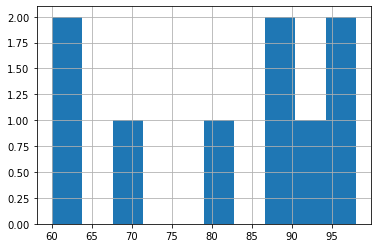

In [225]:
df.marks.hist()

<AxesSubplot:xlabel='subject'>

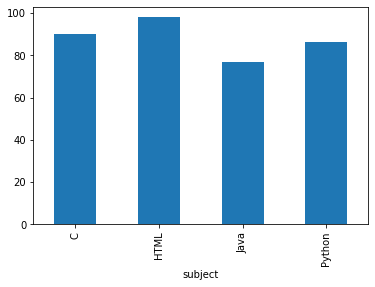

In [226]:
subgroup = df.groupby("subject")["marks"].mean()
subgroup.plot.bar()

In [227]:
subgroup

subject
C         90.000000
HTML      98.000000
Java      76.666667
Python    86.333333
Name: marks, dtype: float64

<AxesSubplot:ylabel='marks'>

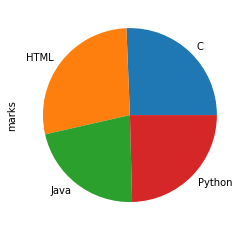

In [228]:
subgroup.plot.pie()